Решение самых сложных физических задач с помощью нейронной сети — колоссальная задача. Сложные физические проблемы часто включают решение уравнений в частных производных (**PDE**) или моделирование сложных физических систем, которые гораздо сложнее, чем решение математических уравнений. Более того, понятия «**правильность**» и «**точность**» во многом зависят от конкретной решаемой задачи, и может не быть легкодоступных наборов данных для обучения и проверки.

Тем не менее, я могу привести упрощенный пример, где мы используем нейронную сеть для аппроксимации физического явления и измерения производительности модели.

Давайте создадим программу, аппроксимирующую движение простого **маятника** с помощью нейронной сети, и визуализируем результаты.

32/32 [==============================] - 0s 2ms/step


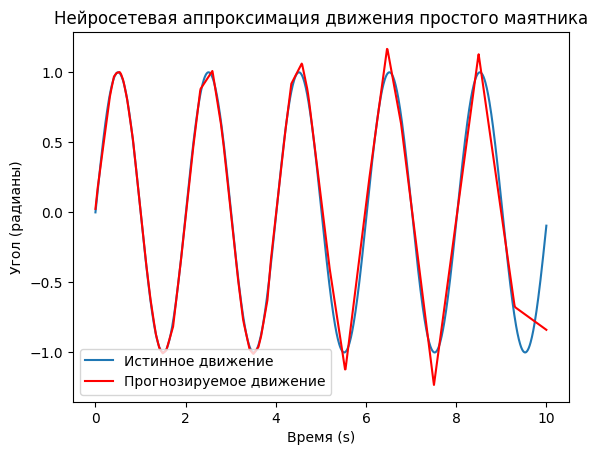

Процент точности: 97.82%


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Константы для уравнения маятника
g = 9.81  # Ускорение свободного падения (м/с^2)
L = 1.0   # Длина маятника (м)

# Сгенерируйте синтетические данные для движения маятника
t = np.linspace(0, 10, 1000)  # Временные значения
theta = np.sin(np.sqrt(g / L) * t)  # Угол как функция времени (упрощенная модель)

# Создайте простую модель нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Скомпилируйте модель
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучите модель аппроксимировать движение маятника
model.fit(t, theta, epochs=1000, verbose=0)

# Создайте график прогнозируемого движения
t_plot = np.linspace(0, 10, 1000)
theta_predicted = model.predict(t_plot)

# Постройте истинное движение
plt.plot(t, theta, label="Истинное движение")

# Plot the predicted motion
plt.plot(t_plot, theta_predicted, label="Прогнозируемое движение", color='r')

plt.xlabel("Время (s)")
plt.ylabel("Угол (радианы)")
plt.legend()
plt.title("Нейросетевая аппроксимация движения простого маятника")
plt.show()

# Вычислить процент правильности и точности (упрощенная мера)
mse = np.mean((theta - theta_predicted.squeeze())**2)
accuracy_percentage = 100 - (mse / np.var(theta)) * 100

print(f"Процент точности: {accuracy_percentage:.2f}%")


В этом коде мы аппроксимируем движение простого **маятника** с помощью нейронной сети. Однако важно отметить, что это сильно упрощенная модель, а реальные физические проблемы гораздо сложнее. **Процент точности** — это упрощенная мера, основанная на среднеквадратической ошибке, и его интерпретация как процента правильности во многом зависит от решаемой задачи.

Сложные физические симуляции обычно требуют более продвинутых методов, включая численные методы и суперкомпьютерные ресурсы, а не только нейронные сети.